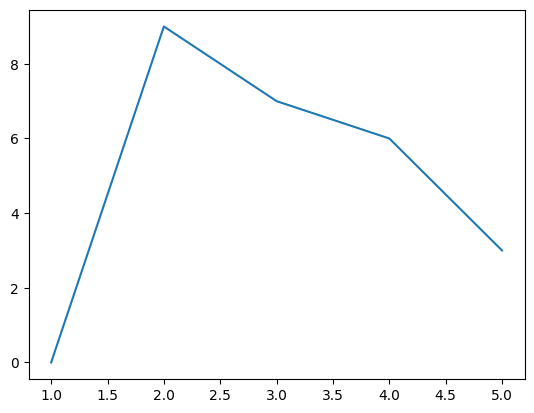

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

a = np.array([1,2,3,4,5])
b = np.array([0,9,7,6,3])
# %matplotlib
plt.figure()
plt.plot(a,b)
plt.show()

In [2]:
import pandas as pd
schema = pd.read_csv('survey_results_schema.csv')
data = pd.read_csv('survey_results_public.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [3]:
data.head()

ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   

                                    CodingActivities  \
0                                                NaN   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   
3  Colleague;Friend or family member;Other online...   
4  Books / Physical media;Online Courses or Certi...   

                                     LearnCodeOnline  ...        Frequency_1  \
0                                                NaN  ...                NaN   
1  Formal documentation provided by the owner of ...  ...   1-2 times a week   
2  Formal documentation provided by the owner of ...  ...  6-10 times a week   
3  Formal documentation provided by the owner of ...  ...   1-2 times a week   
4  Formal documentation provided by the owner of ...  ...   1-2 times a week   

         Frequency_2       Frequency_3         TimeSearching  \
0                NaN               NaN                   NaN   
1   10+ times a week             Never   15-30 minutes a day   
2  6-10 times a week  3-5 times a week   30-60 minutes a day   
3   10+ times a week  1-2 times a week   15-30 minutes a day   
4   1-2 times a week  3-5 times a week  60-120 minutes a day   

         TimeAnswering                                   ProfessionalTech  \
0                  NaN                                                NaN   
1  15-30 minutes a day  DevOps function;Microservices;Automated testin...   
2  30-60 minutes a day  DevOps function;Microservices;Automated testin...   
3  30-60 minutes a day  Automated testing;Continuous integration (CI) ...   
4  30-60 minutes a day  Microservices;Automated testing;Observability ...   

                                            Industry           SurveyLength  \
0                                                NaN                    NaN   
1  Information Services, IT, Software Development...  Appropriate in length   
2  Information Services, IT, Software Development...  Appropriate in length   
3                                                NaN  Appropriate in length   
4                                              Other  Appropriate in length   

                   SurveyEase ConvertedCompYearly  
0                         NaN                 NaN  
1                        Easy            285000.0  
2              

In [4]:
# max_yearly_comp = data['ConvertedCompYearly'].max()
max_yearly_comp = data['ConvertedCompYearly'].quantile(q=0.999)
min_yearly_comp = data['ConvertedCompYearly'].min()
comp_range = max_yearly_comp-min_yearly_comp
steps = 20
plot_data = {}

for i in range(steps):
    lower = int(min_yearly_comp+(comp_range/steps * i))
    upper = int(min_yearly_comp+(comp_range/steps * (i+1)))
    # name = f'{lower//1000*1000}-{upper//1000*1000}'
    name = f'{lower//1000}k-{upper//1000}k'
    people_count = data[
        (data['ConvertedCompYearly'] >= lower) & (data['ConvertedCompYearly'] <= upper)
        ].shape[0]
    plot_data[name] = people_count

plot_data

{'0k-60k': 18414,
 '60k-120k': 17668,
 '120k-180k': 7847,
 '180k-240k': 3047,
 '240k-300k': 1225,
 '300k-360k': 551,
 '360k-420k': 224,
 '420k-480k': 117,
 '480k-540k': 99,
 '540k-600k': 58,
 '600k-660k': 48,
 '660k-720k': 20,
 '720k-780k': 11,
 '780k-840k': 16,
 '840k-900k': 12,
 '900k-960k': 13,
 '960k-1020k': 13,
 '1020k-1080k': 4,
 '1080k-1140k': 1,
 '1140k-1200k': 7}

In [5]:
import plotly.graph_objects as go
bar_chart = go.Bar(
    x=list(plot_data.keys()),
    y=list(plot_data.values()),
    marker=dict(
        color=list(plot_data.values()),
        coloraxis='coloraxis',
        line_color='rgb(0,0,0)',
        line_width=2
    )
)

In [6]:
layout = go.Layout(
    title=dict(
        text='Распределение разработчиков по годовому доходу',
        x=0.5,
        y=0.99,
        xanchor='center',
        yanchor='top',
        font=dict(size=20)
    ),
    xaxis=dict(
        title='Годовой доход (99.9 перцентиль)',
        titlefont=dict(size=16),
        tickfont=dict(size=14),
        tickangle=315,
        gridwidth=2,
        gridcolor='ivory'
    ),
    yaxis=dict(
        title='Количество разработчиков',
        titlefont=dict(size=16),
        gridwidth=2,
        gridcolor='ivory',
    ),
    autosize=True,
    height=700,
    margin=go.layout.Margin(l=0,r=0,b=0,t=0)
)

In [7]:
fig = go.Figure(data=[bar_chart],layout=layout)
fig.show()

In [8]:
keys = list(plot_data.keys())
left = list(keys)[2].split('-')[0]
right = list(keys)[-1].split('-')[1]
new_key = f'{left}-{right}'
total = sum(list(plot_data.values())[2:])

pie_data = {
    keys[0]: plot_data[keys[0]],
    keys[1]: plot_data[keys[1]],
    new_key: total
}

pie_data

{'0k-60k': 18414, '60k-120k': 17668, '120k-1200k': 13313}

In [9]:
fig = go.Figure(
    data=[
        go.Pie(
            labels=list(pie_data.keys()),
            values=list(pie_data.values()),
            textinfo='percent+label',
            marker=dict(
                line=dict(
                    color='black',
                    width=2
                )
            )
        )
    ]
)

In [10]:
fig.update_layout(
    title=dict(
        text='Распределение разработчиков по годовому доходу',
        x=0.5,
        y=0.99,
        xanchor='center',
        yanchor='top',
        font=dict(size=20)
    ),
    showlegend=False,
    width=None,
    height=700,
    margin=dict(l=0,r=0,t=30,b=5)
)

fig.update_traces(textfont_size=16, textfont_color='white')
fig.show()

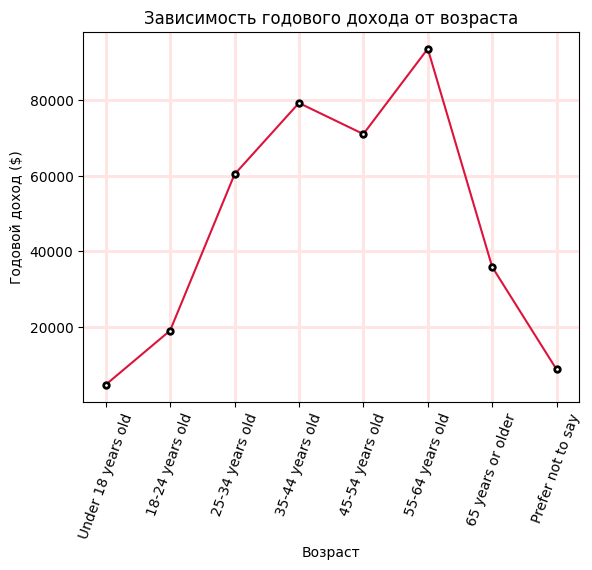

In [11]:
import matplotlib.pyplot as plt

keys = list(data['Age'].unique())
keys.insert(0, keys.pop(4))
keys.insert(3, keys.pop(4))
counts = data['Age'].value_counts()
chart_data = []
for key in keys:
    tmp = data[data['Age'] == key]['ConvertedCompYearly'].sum()
    tmp /= data[data['Age'] == key].shape[0]
    chart_data.append(tmp)
    # chart_data[key]=tmp
chart_data
plt.plot(
    keys,
    chart_data,
    marker='.',
    linestyle='-',
    markersize=8,
    color='crimson',
    markerfacecolor='white',
    markeredgecolor='black',
    markeredgewidth=2
)
plt.xticks(rotation=70)
plt.title('Зависимость годового дохода от возраста')
plt.xlabel('Возраст')
plt.ylabel('Годовой доход ($)')
plt.grid(True, linewidth=2, color='mistyrose')

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

data = pd.read_csv('fashion-mnist_train.csv')

In [13]:
D = data.drop(['label'],axis=1)
D

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       5       0   
3           0       0       0       1       2       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995       0       0       0       0       0       0       0       0       0   
59996       0       0       0       0       0       0       0       0       0   
59997       0       0       0       0       0       0       0       0       0   
59998       0       0       0       0       0       0       0       0       0   
59999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0        30        43   
3            0  ...         3         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
59995        0  ...         0         0         0         0         0   
59996        0  ...        73         0         0         0         0   
59997        0  ...       160       162       163       135        94   
59998        0  ...         0         0         0         0         0   
59999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 784 columns]

In [14]:
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
D

pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3         0.0     0.0     0.0  0.006098  0.008811     0.0     0.0  0.000000   
4         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
...       ...     ...     ...       ...       ...     ...     ...       ...   
59995     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59996     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59997     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59998     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59999     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

       pixel9  pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0         0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
1         0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
2         0.0      0.0  ...  0.000000  0.000000  0.000000  0.117647  0.168627   
3         0.0      0.0  ...  0.011765  0.000000  0.000000  0.000000  0.000000   
4         0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
...       ...      ...  ...       ...       ...       ...       ...       ...   
59995     0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
59996     0.0      0.0  ...  0.286275  0.000000  0.000000  0.000000  0.000000   
59997     0.0      0.0  ...  0.627451  0.635294  0.639216  0.529412  0.368627   
59998     0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
59999     0.0      0.0  ...  0.000000  0.000000  0.000000  0.000000  0.000000   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0      0.000000       0.0       0.0       0.0       0.0  
1      0.000000       0.0       0.0       0.0       0.0  
2      0.000000       0.0       0.0       0.0       0.0  
3      0.003922       0.0       0.0       0.0       0.0  
4      0.000000       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
59995  0.000000       0.0       0.0       0.0       0.0  
59996  0.000000       0.0       0.0       0.0       0.0  
59997  0.000000       0.0       0.0       0.0       0.0  
59998  0.000000       0.0       0.0       0.0       0.0  
59999  0.000000       0.0       0.0       0.0       0.0  

[60000 rows x 784 columns]

In [15]:
# import time 
# tsne_features = {}
# perplexity_array = (5,25,50)
# for p in perplexity_array:
#     start = time.perf_counter()
#     print(f'Training TSNE(perplexity={p})...')
#     tsne_model = TSNE(n_components=2, perplexity=p, random_state=123)
#     tsne_features[p] = tsne_model.fit_transform(D)
#     end = time.perf_counter()
#     print(f'Elapsed time: {end-start:.3f}s')

In [16]:
# plt.figure(figsize = (12,9))
# for perplexity, features in tsne_features.items():
#     plot_data = D.copy()
#     plot_data['x'] = features[:,0]
#     plot_data['y'] = features[:,1]
#     plt.figure(figsize=(16,12))
#     plt.title(f'TSNE(perplexity={perplexity})')
#     sns.scatterplot(x='x', y='y', hue=data['label'], data=plot_data, palette='bright')
#     plt.show()


In [17]:
import umap.umap_ as umap

n_n = (5,25,50)
m_d = (0.1, 0.6)

/home/stets/code/uni/bigdata/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [18]:
import time
umap_features = {}
for n_neighbors in n_n:
    for min_dist in m_d:
        start = time.perf_counter()
        print(f'Training UMAP(n_neighbors={n_neighbors}, min_dist={min_dist})...')
        umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=123)
        umap_features[(n_neighbors, min_dist)] = umap_model.fit_transform(D)
        end = time.perf_counter()
        print(f'Elapsed time: {end-start:.3f}s')

Training UMAP(n_neighbors=5, min_dist=0.1)...


/home/stets/code/uni/bigdata/env/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Elapsed time: 40.795s
Training UMAP(n_neighbors=5, min_dist=0.6)...


/home/stets/code/uni/bigdata/env/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Elapsed time: 23.830s
Training UMAP(n_neighbors=25, min_dist=0.1)...


/home/stets/code/uni/bigdata/env/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Elapsed time: 46.533s
Training UMAP(n_neighbors=25, min_dist=0.6)...


/home/stets/code/uni/bigdata/env/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Elapsed time: 50.015s
Training UMAP(n_neighbors=50, min_dist=0.1)...


/home/stets/code/uni/bigdata/env/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Elapsed time: 60.916s
Training UMAP(n_neighbors=50, min_dist=0.6)...


/home/stets/code/uni/bigdata/env/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Elapsed time: 62.626s


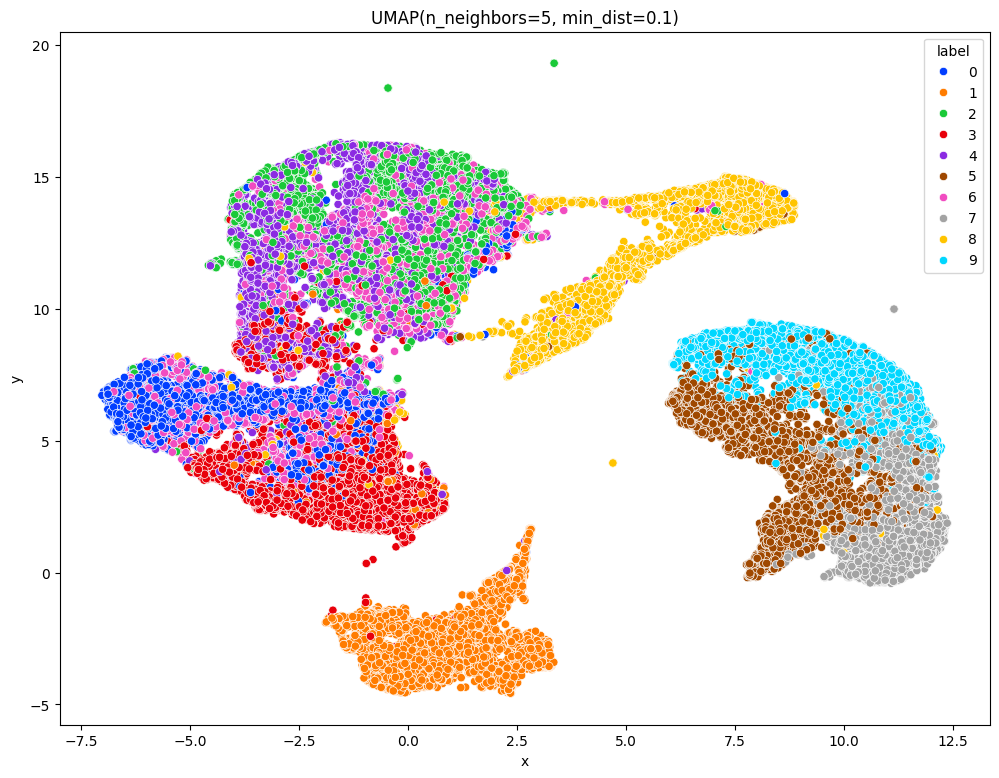

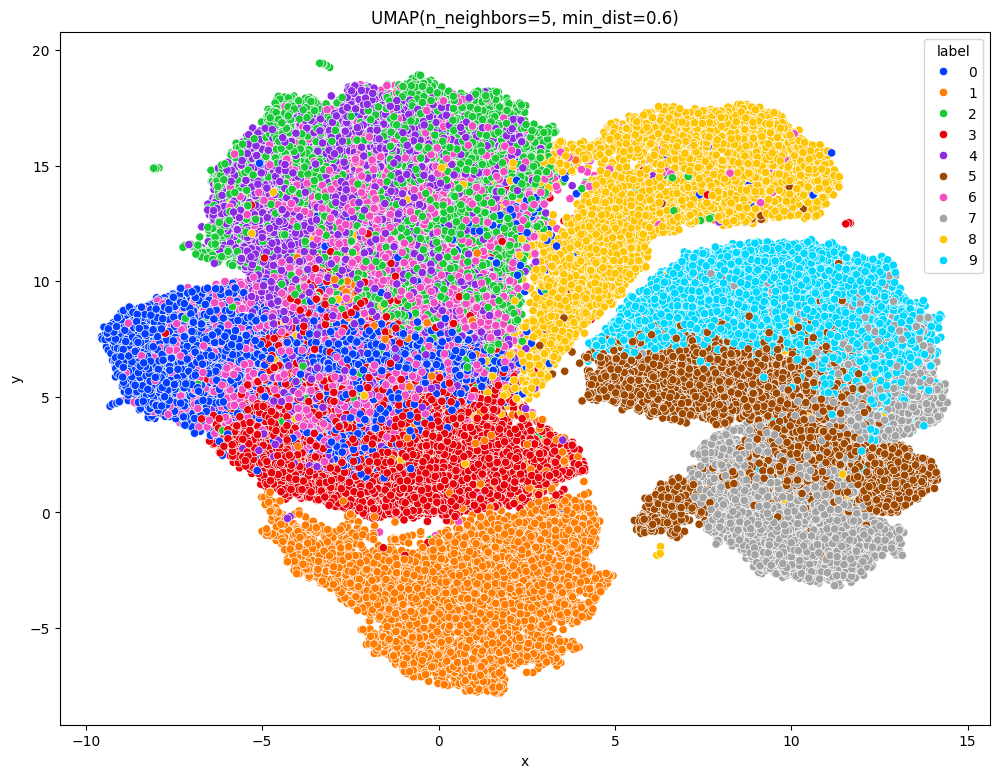

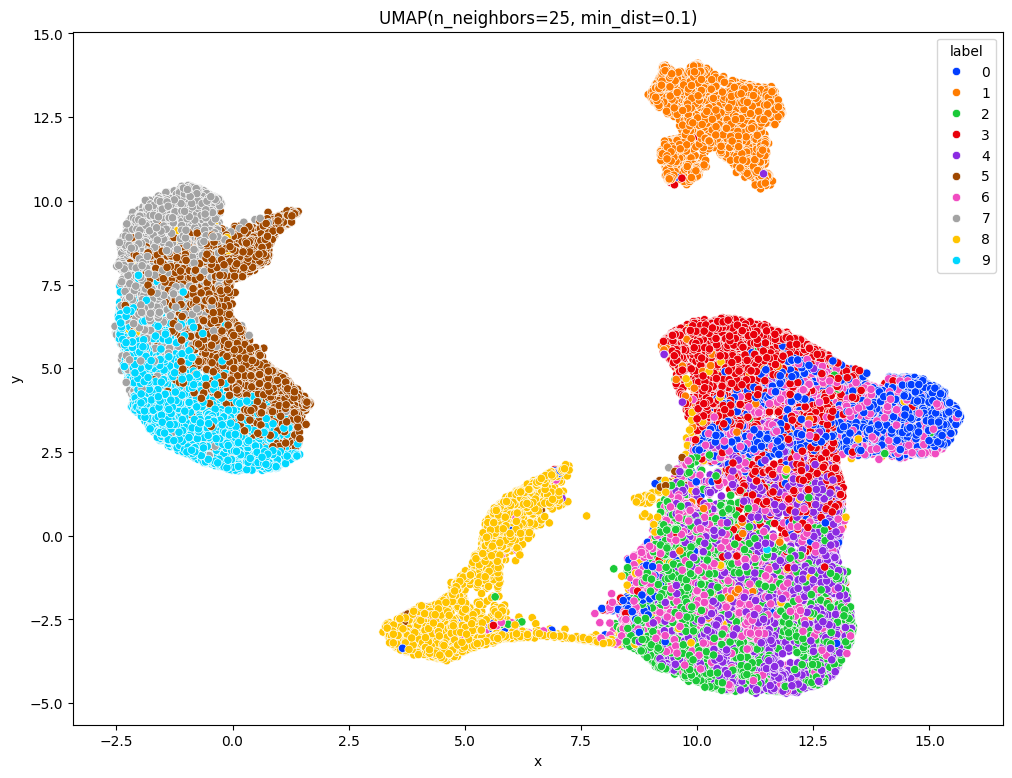

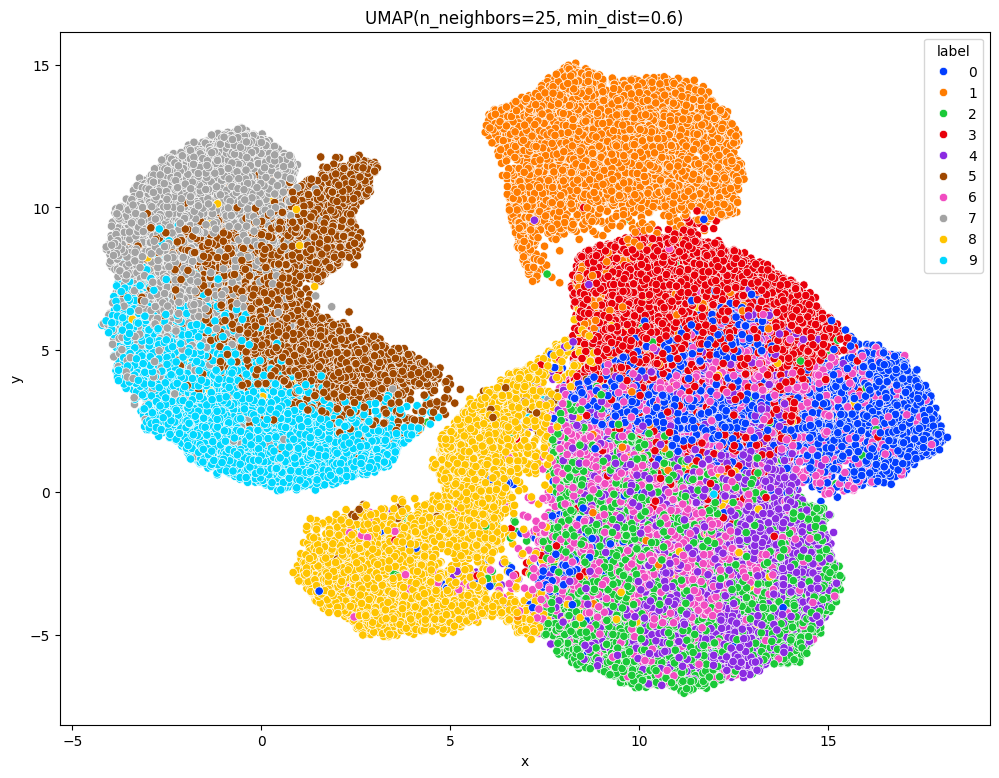

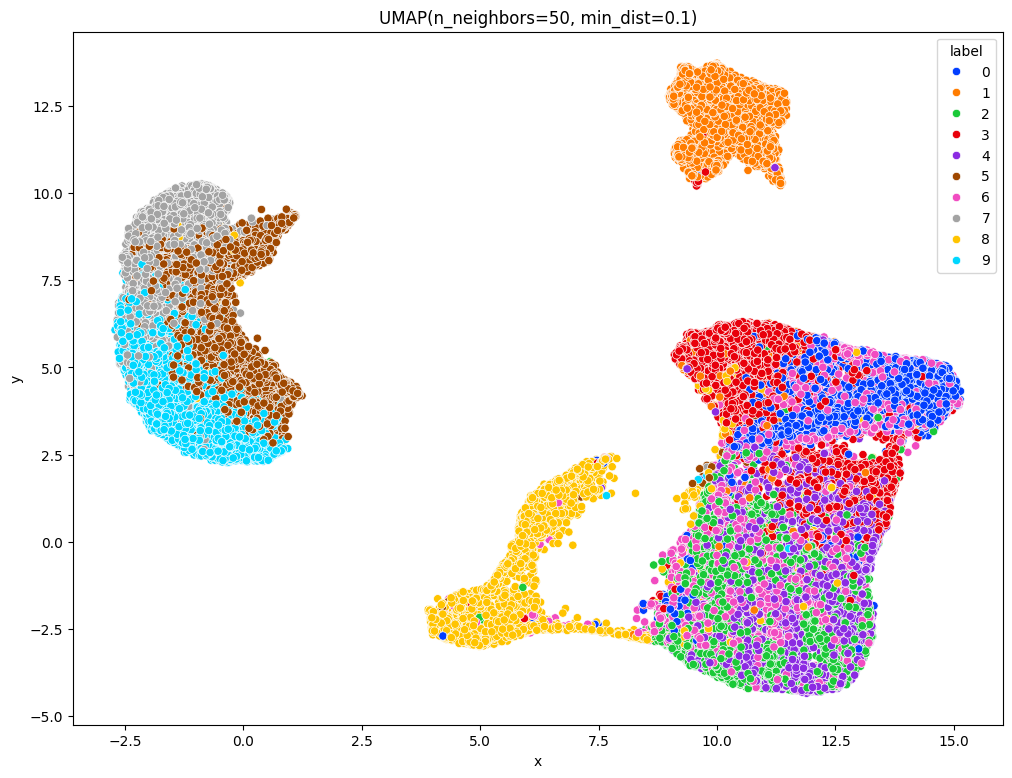

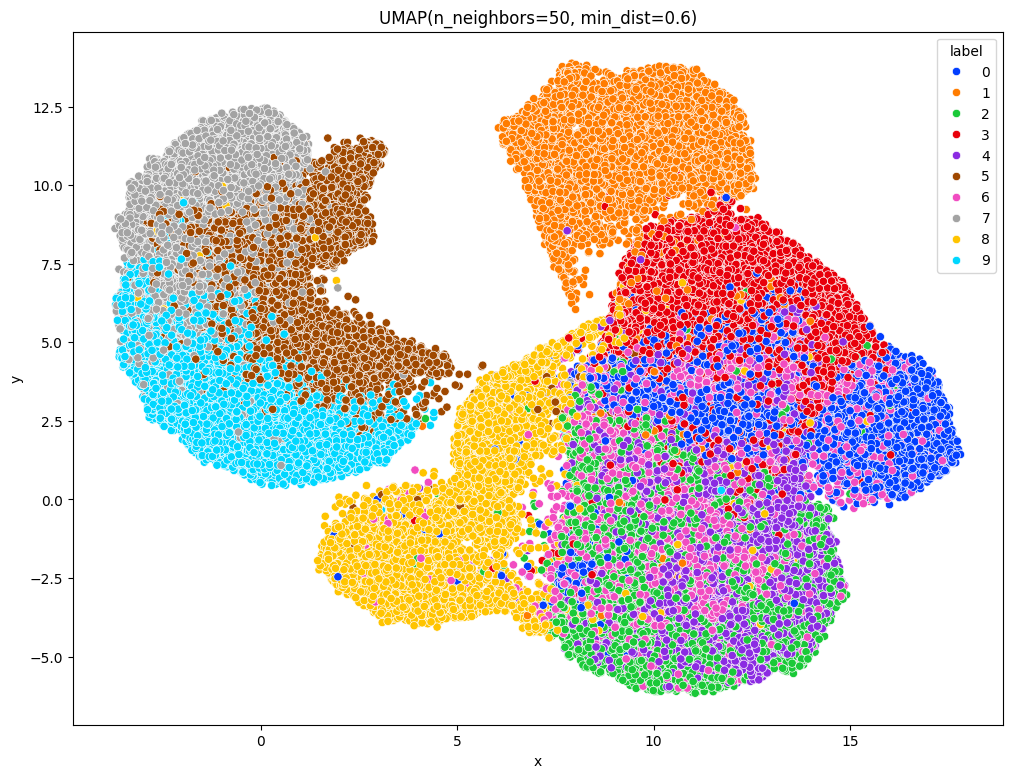

In [19]:
for (n_neighbors, min_dist), features in umap_features.items():
    plot_data = D.copy()
    plot_data['x'] = features[:, 0]
    plot_data['y'] = features[:, 1]
    plt.figure(figsize=(12,9))
    plt.title(f'UMAP(n_neighbors={n_neighbors}, min_dist={min_dist})')
    sns.scatterplot(x='x', y='y', hue=data['label'], data=plot_data, palette='bright')
    plt.show()